## Business Problem

One of the global banks would like to understand what factors driving credit card spend are. The bank want use these insights to calculate credit limit. In order to solve the problem, the bank conducted survey of 5000 customers and collected data.
The objective of this case study is to understand what's driving the total spend (Primary Card + Secondary card). Given the factors, predict credit limit for the new applicants

### Import necessary packages

In [2]:
import numpy as np
import pandas as pd

#for charts
import matplotlib.pyplot as plt
import seaborn as sns

#for stats
import scipy.stats as stats

In [3]:
#for profiling
import pandas_profiling

In [4]:
#for stats model
import statsmodels.formula.api as smf

In [839]:
#for metrics
from sklearn import metrics

### Data Import

In [1121]:
data = pd.read_excel('Data Set.xlsx')

In [1122]:
data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [1123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [1124]:
data.describe()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
count,5000.00000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.00000,5000.000000,...,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.00140,2.687275,0.503600,47.025600,4.238800,14.543000,2.672000,2.7528,0.15120,9.730400,...,0.932800,0.201000,0.63280,0.479200,0.474800,0.178800,0.472600,0.083600,0.129800,0.102600
std,1.42176,1.425925,0.500037,17.770338,1.308785,3.281083,1.211738,1.7379,0.35828,9.690929,...,0.250393,0.400788,0.48209,0.499617,0.499415,0.383223,0.499299,0.276815,0.336117,0.303466
min,1.00000,1.000000,0.000000,18.000000,2.000000,6.000000,1.000000,1.0000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,1.000000,0.000000,31.000000,3.000000,12.000000,2.000000,1.0000,0.00000,2.000000,...,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.00000,3.000000,1.000000,47.000000,4.000000,14.000000,2.000000,2.0000,0.00000,7.000000,...,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.00000,4.000000,1.000000,62.000000,5.000000,17.000000,4.000000,4.0000,0.00000,15.000000,...,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,5.00000,5.000000,1.000000,79.000000,6.000000,23.000000,5.000000,6.0000,1.00000,52.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data Inspection

In [1125]:
# Creating Dependent Y column

#combining total spend on both cards for each customer as our dependend variable
data['total_spend'] = data.cardspent + data.card2spent

In [1126]:
data.drop(columns=['cardspent', 'card2spent'], inplace=True)

In [1127]:
data.drop(columns='custid', inplace=True)

In [1128]:
data.shape

(5000, 128)

In [1129]:
data.total_spend.head()

0    149.46
1     77.54
2    359.97
3    359.41
4    507.83
Name: total_spend, dtype: float64

#### Profiling

In [96]:
data.shape

(5000, 128)

In [97]:
card = data.profile_report()
#card

In [98]:
card.to_file(output_file= 'profile_report_card.html')

Based on profiling card2tenure, commutecat and tenure can be droped because of high multicollinearty.

### Seperating continous and categorical variables

In [1130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 128 entries, region to total_spend
dtypes: float64(30), int64(97), object(1)
memory usage: 4.9+ MB


In [1132]:
# Manually select features which looks like continous but are actually categorical
#added employ,address,cardtenure,card2tenure
cat_var_list = ['region', 'townsize', 'gender', 'agecat', 'birthmonth', 'edcat', 'jobcat','union','empcat','retire',
                'inccat', 'default', 'jobsat', 'marital', 'spousedcat','homeown','hometype','addresscat','cars', 'carown',
                'cartype', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutecar',
                'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike',
                'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib',
                'vote','card','cardtype','cardbenefit','cardfee' ,'cardtenurecat','card2','card2type','card2benefit',
                'card2fee', 'card2tenurecat', 'active', 'bfast', 'churn', 'tollfree', 'equip', 'callcard', 'wireless',
                'multline','voice','pager','internet','callid', 'callwait','forward','confer','ebill','owntv',
                'ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax',
                'news','response_01','response_02','response_03'
                ]
print(len(cat_var_list))
for x in cat_var_list:
    data[x] = data[x].astype('object')

80


In [1133]:
cont_var = data.loc[:,((data.dtypes == 'int64') | (data.dtypes == 'float64') | (data.dtypes == 'int32') | (data.dtypes == 'float32'))]
cat_var = data.loc[:,data.dtypes == 'object']

In [1134]:
profile_diff_cat = ['addresscat', 'agecat', 'birthmonth','card2tenurecat', 'commutecat', 'edcat', 'spousedcat', 'marital']
profile_diff_cont = ['equipmon', 'lncadmon', 'lnequipmon','lnequipten']
#cat_var.drop(columns=profile_diff_cat)

In [1135]:
print(cont_var.columns)
print(cat_var.columns)

Index(['age', 'ed', 'employ', 'income', 'lninc', 'debtinc', 'creddebt',
       'lncreddebt', 'othdebt', 'lnothdebt', 'spoused', 'reside', 'pets',
       'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small',
       'pets_saltfish', 'pets_freshfish', 'address', 'carvalue', 'commutetime',
       'cardtenure', 'card2tenure', 'tenure', 'longmon', 'lnlongmon',
       'longten', 'lnlongten', 'tollmon', 'lntollmon', 'tollten', 'lntollten',
       'equipmon', 'lnequipmon', 'equipten', 'lnequipten', 'cardmon',
       'lncardmon', 'cardten', 'lncardten', 'wiremon', 'lnwiremon', 'wireten',
       'lnwireten', 'hourstv', 'total_spend'],
      dtype='object')
Index(['region', 'townsize', 'gender', 'agecat', 'birthmonth', 'edcat',
       'jobcat', 'union', 'empcat', 'retire', 'inccat', 'default', 'jobsat',
       'marital', 'spousedcat', 'homeown', 'hometype', 'addresscat', 'cars',
       'carown', 'cartype', 'carcatvalue', 'carbought', 'carbuy', 'commute',
       'commutecat', 'comm

In [1136]:
def continous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),x.std(),
                      x.var(), x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), x.quantile(0.25),
                      x.quantile(0.50), x.quantile(0.75), x.quantile(0.90), x.quantile(0.95), 
                      x.quantile(0.99), x.max()],
                    index = ['N', 'NMiss', 'Sum', 'Mean', 'Median', 'SD', 'Var', 'Min', 'P1', 'P5', 'P10','P25',
                            'P50', 'P75', 'P90', 'P95', 'P99', 'Max'])
    

In [1137]:
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0,1],
                     round((Mode.iloc[0,1]*100)/x.count(), 2)],
                     index = ['N', 'NMiss', 'Mode', 'Freq', 'Percent'])

In [1138]:
#function for creating dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first= True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace= True)
    return df

In [1139]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [1140]:
cont_var.apply(lambda x : continous_var_summary(x)).T.round(3)

,N,NMiss,Sum,Mean,Median,SD,Var,Min,P1,P5,P10,P25,P50,P75,P90,P95,P99,Max
age,5000.0,0.0,235128.000,47.026,47.000,17.770,315.785,18.000,18.000,20.000,23.000,31.000,47.000,62.000,72.000,76.000,79.000,79.000
ed,5000.0,0.0,72715.000,14.543,14.000,3.281,10.766,6.000,8.000,9.000,10.000,12.000,14.000,17.000,19.000,20.000,21.000,23.000
employ,5000.0,0.0,48652.000,9.730,7.000,9.691,93.914,0.000,0.000,0.000,0.000,2.000,7.000,15.000,25.000,31.000,39.000,52.000
income,5000.0,0.0,273798.000,54.760,38.000,55.378,3066.669,9.000,9.000,13.000,16.000,24.000,38.000,67.000,109.100,147.000,272.010,1073.000
lninc,5000.0,0.0,18499.547,3.700,3.638,0.747,0.558,2.197,2.197,2.565,2.773,3.178,3.638,4.205,4.692,4.990,5.606,6.978
debtinc,5000.0,0.0,49770.800,9.954,8.800,6.400,40.957,0.000,0.700,1.900,2.800,5.100,8.800,13.600,18.600,22.200,29.200,43.100
creddebt,5000.0,0.0,9286.628,1.857,0.926,3.416,11.667,0.000,0.033,0.101,0.176,0.386,0.926,2.064,4.299,6.373,14.280,109.073
lncreddebt,4999.0,1.0,-652.137,-0.130,-0.076,1.273,1.621,-6.597,-3.402,-2.292,-1.738,-0.953,-0.076,0.725,1.459,1.852,2.659,4.692
othdebt,5000.0,0.0,18272.301,3.654,2.099,5.395,29.108,0.000,0.114,0.288,0.458,0.980,2.099,4.315,8.062,11.816,24.064,141.459
lnothdebt,4999.0,1.0,3483.879,0.697,0.742,1.129,1.274,-4.092,-2.168,-1.243,-0.780,-0.019,0.742,1.462,2.087,2.470,3.181,4.952


In [1141]:
cat_var.apply(lambda x : categorical_var_summary(x)).T

,N,NMiss,Mode,Freq,Percent
region,5000,0,5,1027,20.54
townsize,4998,2,1,1436,28.73
gender,5000,0,1,2518,50.36
agecat,5000,0,4,1222,24.44
birthmonth,5000,0,September,458,9.16
edcat,5000,0,2,1567,31.34
jobcat,5000,0,2,1640,32.8
union,5000,0,0,4244,84.88
empcat,5000,0,2,1180,23.6
retire,5000,0,0,4262,85.24


1. Most variables shows sign of outlier data on upper side , so to be in safer side we will treat do outlier treatment. 
2. For variable having missing values, we need to impute them.For continous variable we can impute it with mean value and for categorical variables we can impute with mode value.

### Outlier Treatment

In [1142]:
cont_var = cont_var.apply(lambda x : x.clip(lower = x.quantile(0.01),
                                            upper = x.quantile(0.99)))

### Missing value Treatment

In [1143]:
cont_var = cont_var.apply(lambda x : missing_imputation(x))
cat_var = cat_var.apply(lambda x : missing_imputation(x))

In [1144]:
cont_var.apply(lambda x : continous_var_summary(x)).T.round(2)

,N,NMiss,Sum,Mean,Median,SD,Var,Min,P1,P5,P10,P25,P50,P75,P90,P95,P99,Max
age,5000.0,0.0,235128.00,47.03,47.00,17.77,315.78,18.00,18.00,20.00,23.00,31.00,47.00,62.00,72.00,76.00,79.00,79.00
ed,5000.0,0.0,72721.00,14.54,14.00,3.24,10.51,8.00,8.00,9.00,10.00,12.00,14.00,17.00,19.00,20.00,21.00,21.00
employ,5000.0,0.0,48490.00,9.70,7.00,9.58,91.81,0.00,0.00,0.00,0.00,2.00,7.00,15.00,25.00,31.00,39.00,39.00
income,5000.0,0.0,268149.50,53.63,38.00,46.57,2168.55,9.00,9.00,13.00,16.00,24.00,38.00,67.00,109.10,147.00,272.00,272.01
lninc,5000.0,0.0,18485.25,3.70,3.64,0.74,0.55,2.20,2.20,2.56,2.77,3.18,3.64,4.20,4.69,4.99,5.61,5.61
debtinc,5000.0,0.0,49570.60,9.91,8.80,6.24,38.96,0.70,0.70,1.90,2.80,5.10,8.80,13.60,18.60,22.20,29.20,29.20
creddebt,5000.0,0.0,8791.84,1.76,0.93,2.38,5.67,0.03,0.03,0.10,0.18,0.39,0.93,2.06,4.30,6.37,14.28,14.28
lncreddebt,5000.0,0.0,-638.90,-0.13,-0.08,1.24,1.54,-3.40,-3.40,-2.29,-1.74,-0.95,-0.08,0.72,1.46,1.85,2.66,2.66
othdebt,5000.0,0.0,17612.53,3.52,2.10,4.22,17.82,0.11,0.11,0.29,0.46,0.98,2.10,4.31,8.06,11.82,24.06,24.06
lnothdebt,5000.0,0.0,3491.93,0.70,0.74,1.10,1.22,-2.17,-2.17,-1.24,-0.78,-0.02,0.74,1.46,2.09,2.47,3.18,3.18


In [1145]:
cat_var.apply(lambda x : categorical_var_summary(x)).T.round(2)

,N,NMiss,Mode,Freq,Percent
region,5000,0,5,1027,20.54
townsize,4998,2,1,1436,28.73
gender,5000,0,1,2518,50.36
agecat,5000,0,4,1222,24.44
birthmonth,5000,0,September,458,9.16
edcat,5000,0,2,1567,31.34
jobcat,5000,0,2,1640,32.8
union,5000,0,0,4244,84.88
empcat,5000,0,2,1180,23.6
retire,5000,0,0,4262,85.24


#### Dummy variable creation

In [1146]:
cat_var.head()

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,empcat,retire,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,2,September,3,1,1,1,0,...,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,2,May,4,2,0,1,0,...,1,1,1,1,1,1,1,0,0,0
2,3,4.0,1,6,June,2,2,0,5,0,...,1,0,0,0,0,0,1,0,0,0
3,4,3.0,0,2,May,3,2,0,1,0,...,1,0,1,1,1,0,1,1,0,0
4,2,2.0,0,3,July,3,2,0,1,0,...,1,0,1,0,1,0,0,0,1,0


In [1147]:
#We cannot use categorical variables as it is more out modelling, hence we need to create dummies out of them.
cat_var_list = list(cat_var.columns)
len(cat_var_list)

80

In [1148]:
for c_feature in cat_var_list:
    cat_var[c_feature] = cat_var[c_feature].astype('category')
    cat_var = create_dummies(cat_var, c_feature)

In [1149]:
cat_var.head()

,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,gender_1,agecat_3,...,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
1,0,0,0,1,0,0,0,1,0,0,...,1,1,1,1,1,1,1,0,0,0
2,0,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,1,0,1,1,1,0,1,1,0,0
4,1,0,0,0,1,0,0,0,0,1,...,1,0,1,0,1,0,0,0,1,0


### Final data for analysis

#### Combining cont and cat variable

In [1150]:
cust_data_new = pd.concat([cont_var, cat_var], axis = 1)

In [1151]:
cust_data_new.head()

,age,ed,employ,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,...,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
0,20,15,0,31.0,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,...,0,0,0,1,1,0,0,0,1,0
1,22,17,0,15.0,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,...,1,1,1,1,1,1,1,0,0,0
2,67,14,16,35.0,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,...,1,0,0,0,0,0,1,0,0,0
3,23,16,0,20.0,2.995732,5.7,0.033160,-3.401690,1.117200,0.110826,...,1,0,1,1,1,0,1,1,0,0
4,26,16,1,23.0,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,...,1,0,1,0,1,0,0,0,1,0


In [1152]:
cust_data_new.shape

(5000, 227)

### Assumptions check(For Linear regression)

In [1153]:
#1. No. of observation > no. of col
cust_data_new.shape

(5000, 227)

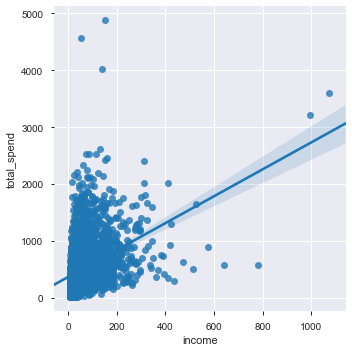

In [1154]:
#2. Check linearity of independent variables

sns.lmplot(x= 'income', y= 'total_spend', data = data)
plt.show()

From baove we can see that most of the points are near the line which means that our data is linear with our Y variable and we can go ahead with the processing

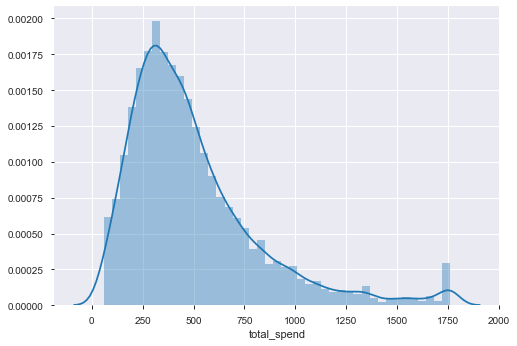

In [1155]:
#3. We need to check assumption that dependent variable is linear and normally distributed.

sns.distplot(cust_data_new.total_spend)
plt.show()

#### Data Transformation

In [1156]:
cust_data_new['ln_total_spend'] = cust_data_new.total_spend.apply(lambda x : np.log(x + 1))

In [1157]:
cust_data_new[['total_spend', 'ln_total_spend']].head()

,total_spend,ln_total_spend
0,149.46,5.013697
1,77.54,4.363608
2,359.97,5.888795
3,359.41,5.887242
4,507.83,6.232114


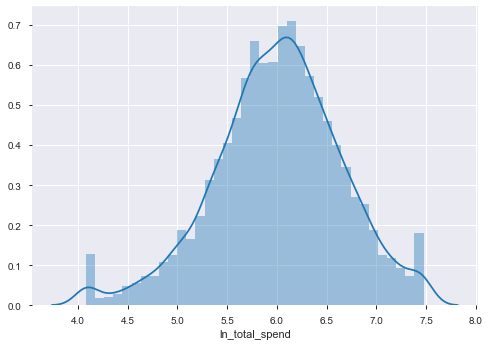

In [1158]:
sns.distplot(cust_data_new.ln_total_spend)
plt.show()

Now atleast Y variable is normally distributed

### Correlation between X and Y variables

In [152]:
corr_credit_card = cust_data_new.corr()
corr_credit_card.to_excel('corr_credit.xlsx')

1. age - empcat(0.79), retire(0.5), address(0.8), card2tenure, cardtenure, tenure
2. income - credtdebt(0.6), debt(0.6), carvalue(0.8)
3. creddebt -  othdebt(0.6), carvaluue(0.5)
4. othdebt -  debtinc(0.5), carvalue(0.6)
5. marital - reside(0.6)
6. address - age(0.8), empcat(0.6), cardtenure(0.7), card2tenure, tenure
7. cars - commute(0.5), commutecat(0.6)
8. commute = commutecat(0.9)
9. cardtenure - card2tenure(0.9), tenure(0.9)

### Model Building

#### Split the data into train and test

In [1228]:
feature_columns = cust_data_new.columns.difference(['ln_total_spend', 'total_spend'])

In [1229]:
from sklearn.model_selection import train_test_split
#split for statistical technique

train, test = train_test_split(cust_data_new, test_size = 0.3, random_state = 5555)
print('No. of observations in train : ', train.shape[0] , '|', 'No. of observations in test : ', test.shape[0])

No. of observations in train :  3500 | No. of observations in test :  1500


In [1230]:
train.columns

Index(['age', 'ed', 'employ', 'income', 'lninc', 'debtinc', 'creddebt',
       'lncreddebt', 'othdebt', 'lnothdebt',
       ...
       'ownpda_1', 'ownpc_1', 'ownipod_1', 'owngame_1', 'ownfax_1', 'news_1',
       'response_01_1', 'response_02_1', 'response_03_1', 'ln_total_spend'],
      dtype='object', length=228)

In [1231]:
#split for sklearn based technique

train_x, test_x, train_y, test_y = train_test_split(cust_data_new[feature_columns],
                                                   cust_data_new['ln_total_spend'], test_size = 0.3, random_state = 5555)
print('No. of observations in train : ', train_x.shape[0] , '|', 'No. of observations in test : ', test_x.shape[0])

No. of observations in train :  3500 | No. of observations in test :  1500


In [1232]:
feature_columns

Index(['active_1', 'address', 'addresscat_2', 'addresscat_3', 'addresscat_4',
       'addresscat_5', 'age', 'agecat_3', 'agecat_4', 'agecat_5',
       ...
       'townsize_2.0', 'townsize_3.0', 'townsize_4.0', 'townsize_5.0',
       'union_1', 'voice_1', 'vote_1', 'wireless_1', 'wiremon', 'wireten'],
      dtype='object', length=226)

### Feature Engineering

#### 1. F-regressor(To select the value based on p-value)

In [1234]:
from sklearn.feature_selection import f_regression

In [1235]:
#here we are assuming the c(significance level) = 0.05

In [1236]:
f_values, p_values = f_regression(train_x, train_y)

In [1237]:
f_regression_result = pd.concat([pd.Series(train_x.columns, name = 'Feature_Name'),
                                pd.Series(f_values, name = 'F_Values'),
                                pd.Series(p_values, name = 'P_Values').round(5)], axis = 1)

In [1238]:
sig_variables = f_regression_result.sort_values(by = 'P_Values', ascending= True)
sig_variables

,Feature_Name,F_Values,P_Values
225,wireten,35.904328,0.00000
165,othdebt,276.533833,0.00000
30,carcatvalue_1,378.952236,0.00000
31,carcatvalue_2,38.844842,0.00000
32,carcatvalue_3,294.968463,0.00000
34,card2_3,26.399636,0.00000
121,equipten,29.530573,0.00000
155,lnothdebt,326.717869,0.00000
105,creddebt,216.387302,0.00000
152,lninc,775.182776,0.00000


In [1239]:
sig_variables = sig_variables[sig_variables.P_Values <= 0.05]
sig_variables

,Feature_Name,F_Values,P_Values
225,wireten,35.904328,0.00000
165,othdebt,276.533833,0.00000
30,carcatvalue_1,378.952236,0.00000
31,carcatvalue_2,38.844842,0.00000
32,carcatvalue_3,294.968463,0.00000
34,card2_3,26.399636,0.00000
121,equipten,29.530573,0.00000
155,lnothdebt,326.717869,0.00000
105,creddebt,216.387302,0.00000
152,lninc,775.182776,0.00000


In [1240]:
f_features = sig_variables.Feature_Name
print(len(f_features))

100


### VIF for removing muticollinearity VIF>4~ High multicollinearity with pther variables

In [1241]:
f_formula = 'ln_total_spend ~ ' + ' + '.join(f_features)
f_formula

'ln_total_spend ~ wireten + othdebt + carcatvalue_1 + carcatvalue_2 + carcatvalue_3 + card2_3 + equipten + lnothdebt + creddebt + lninc + owncd_1 + lncreddebt + card_3 + income + inccat_5 + inccat_4 + inccat_3 + homeown_1 + carown_0 + carown_1 + gender_1 + card_2 + owndvd_1 + equipmon + reason_2 + agecat_4 + tollten + wireless_1 + wiremon + carvalue + retire_1 + owntv_1 + agecat_5 + ed + agecat_6 + ownvcr_1 + card2_2 + employ + hometype_2 + jobcat_2 + inccat_2 + tollmon + ownfax_1 + ownpda_1 + card_4 + pager_1 + equip_1 + card2_5 + vote_1 + lntollten + internet_4 + empcat_4 + addresscat_4 + tollfree_1 + reason_4 + lnequipmon + lnlongten + internet_3 + empcat_5 + edcat_4 + lnwireten + card2tenure + card2_4 + lnequipten + cardtenure + response_03_1 + callwait_1 + edcat_2 + ownpc_1 + card_5 + cardtenurecat_5 + multline_1 + hourstv + confer_1 + callid_1 + tenure + card2tenurecat_2 + addresscat_3 + address + addresscat_2 + ownipod_1 + cardtenurecat_4 + jobsat_5 + ebill_1 + forward_1 + edcat

In [1244]:
f_formula = '''ln_total_spend ~ wireten + othdebt + carcatvalue_1 + carcatvalue_2 + carcatvalue_3 +
                 card2_3 + equipten + lnothdebt + creddebt + lninc + owncd_1 + lncreddebt + card_3 +
                 income + inccat_5 + inccat_4 + inccat_3 + homeown_1 + carown_0 + carown_1 + gender_1 + 
                 card_2 + owndvd_1 + equipmon + reason_2 + agecat_4 + tollten + wireless_1 + wiremon + 
                 carvalue + retire_1 + owntv_1 + agecat_5 + ed + agecat_6 + ownvcr_1 + card2_2 + employ + 
                 hometype_2 + jobcat_2 + inccat_2 + tollmon + ownfax_1 + ownpda_1 + card_4 + pager_1 +
                 equip_1 + card2_5 + vote_1 + lntollten + internet_4 + empcat_4 + addresscat_4 + tollfree_1 +
                 reason_4 + lnequipmon + lnlongten + internet_3 + empcat_5 + edcat_4 + lnwireten + card2tenure +
                 card2_4 + lnequipten + cardtenure + response_03_1 + callwait_1 + edcat_2 + ownpc_1 + card_5 + 
                 cardtenurecat_5 + multline_1 + hourstv + confer_1 + callid_1 + tenure + card2tenurecat_2 +
                 addresscat_3 + address + addresscat_2 + ownipod_1 + cardtenurecat_4 + jobsat_5 + ebill_1 + 
                 forward_1 + edcat_5 + polview_6 + cardtenurecat_3 + lntollmon + jobcat_3 + agecat_3 + voice_1 +
                 card2tenurecat_4 + lnwiremon + lnlongmon + cartype_0 + card2tenurecat_5 + cardbenefit_3 +
                 bfast_2 + reason_3'''

In [1245]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

#searate x and y variables
y, x = dmatrices(f_formula, train, return_type = 'dataframe')

#for each x calculate vif
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF_Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

#display the value
vif_features = vif.round(1).sort_values(by = 'VIF_Factor', ascending = False)
vif_features

,Features,VIF_Factor
19,carown_0,inf
20,carown_1,inf
3,carcatvalue_1,inf
4,carcatvalue_2,inf
5,carcatvalue_3,inf
0,Intercept,42435.2
24,equipmon,807.9
47,equip_1,671.1
29,wiremon,264.2
28,wireless_1,183.4


In [1246]:
df_vif = vif_features[vif_features['VIF_Factor'] <10]
df_vif

,Features,VIF_Factor
50,lntollten,9.6
38,employ,9.4
33,agecat_5,8.6
61,lnwireten,8.5
64,lnequipten,8.4
17,inccat_3,8.1
26,agecat_4,7.5
59,empcat_5,6.1
79,address,5.9
41,inccat_2,5.3


#### Removing features with high VIF

In [1247]:
f_formula = '''ln_total_spend ~ wireten + othdebt +
                 card2_3 + equipten + lnothdebt + creddebt + lninc + owncd_1 + lncreddebt + card_3 +
                 income + inccat_5 + inccat_4 + inccat_3 + homeown_1  + gender_1 + 
                 card_2 + owndvd_1 + equipmon + reason_2 + agecat_4 + tollten + wireless_1 + wiremon + 
                 carvalue + retire_1 + owntv_1 + agecat_5 + ed + agecat_6 + ownvcr_1 + card2_2 + employ + 
                 hometype_2 + jobcat_2 + inccat_2 + tollmon + ownfax_1 + ownpda_1 + card_4 + pager_1 +
                 equip_1 + card2_5 + vote_1 + lntollten + internet_4 + empcat_4 + addresscat_4 + tollfree_1 +
                 reason_4 + lnequipmon + lnlongten + internet_3 + empcat_5 + edcat_4 + lnwireten + card2tenure +
                 card2_4 + lnequipten + cardtenure + response_03_1 + callwait_1 + edcat_2 + ownpc_1 + card_5 + 
                 cardtenurecat_5 + multline_1 + hourstv + confer_1 + callid_1 + tenure + card2tenurecat_2 +
                 addresscat_3 + address + addresscat_2 + ownipod_1 + cardtenurecat_4 + jobsat_5 + ebill_1 + 
                 forward_1 + edcat_5 + polview_6 + cardtenurecat_3 + lntollmon + jobcat_3 + agecat_3 + voice_1 +
                 card2tenurecat_4 + lnwiremon + lnlongmon + cartype_0 + card2tenurecat_5 + cardbenefit_3 +
                 bfast_2 + reason_3'''

In [1248]:
vif_formula = 'ln_total_spend ~ ' + ' + '.join(df_vif.Features) 
vif_formula

'ln_total_spend ~ lntollten + employ + agecat_5 + lnwireten + lnequipten + inccat_3 + agecat_4 + empcat_5 + address + inccat_2 + cardtenurecat_4 + lnothdebt + othdebt + agecat_3 + ed + lncreddebt + creddebt + retire_1 + addresscat_3 + card2tenurecat_4 + cardtenurecat_3 + addresscat_2 + edcat_4 + edcat_5 + callid_1 + confer_1 + card2_4 + pager_1 + card_4 + homeown_1 + forward_1 + card2_3 + voice_1 + callwait_1 + hometype_2 + addresscat_4 + card2tenurecat_2 + card_3 + card2_2 + card_2 + ownpda_1 + ebill_1 + owntv_1 + ownfax_1 + empcat_4 + multline_1 + owndvd_1 + ownvcr_1 + ownpc_1 + owncd_1 + ownipod_1 + bfast_2 + card2_5 + jobcat_2 + internet_4 + hourstv + card_5 + edcat_2 + internet_3 + jobsat_5 + vote_1 + cartype_0 + jobcat_3 + cardbenefit_3 + response_03_1 + polview_6 + gender_1 + reason_4 + reason_2 + reason_3'

In [1249]:
high_vif = vif_features[vif_features['VIF_Factor'] > 10]
drop_cols = high_vif.Features
list(drop_cols)

['carown_0',
 'carown_1',
 'carcatvalue_1',
 'carcatvalue_2',
 'carcatvalue_3',
 'Intercept',
 'equipmon',
 'equip_1',
 'wiremon',
 'wireless_1',
 'tollmon',
 'tollfree_1',
 'lnequipmon',
 'lnwiremon',
 'lninc',
 'lnlongten',
 'lntollmon',
 'card2tenure',
 'tollten',
 'wireten',
 'cardtenure',
 'tenure',
 'equipten',
 'income',
 'cardtenurecat_5',
 'carvalue',
 'inccat_5',
 'lnlongmon',
 'card2tenurecat_5',
 'agecat_6',
 'inccat_4']

From above variables lninc, income, card2tenure, cardtenure, tenure, shows importance from business point of view . So we will add this in final model

In [1250]:
df_vif

,Features,VIF_Factor
50,lntollten,9.6
38,employ,9.4
33,agecat_5,8.6
61,lnwireten,8.5
64,lnequipten,8.4
17,inccat_3,8.1
26,agecat_4,7.5
59,empcat_5,6.1
79,address,5.9
41,inccat_2,5.3


### Remove features manually one at atime using p-value

#### Define the model

In [1251]:
#Remove all variables with VIF>~5 and after then remove variables one at a time using p-value(select only those < 0.05)
#from the model summary

#Adding income and lninc as it is a important fetaure from business point of view, as it got removed while removing vif>10
#But as income is highly correlated with lninc, hnce remove income vriable. Also add card2tenure

vif_formula = '''ln_total_spend ~ lninc +
                      
                   ed      + 
                     cardtenurecat_3  + card_4 +
                   card2_4   +
                   card2_3  +   card2_2 + card_3 + card_2  +
                    card2_5   + card_5 +
                    reason_2 + reason_4 + gender_1 +
                   age'''

#### Fit/Process the model

In [1252]:
lm = smf.ols(vif_formula, train).fit()

#### Validate the model

In [1253]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_total_spend   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     131.5
Date:                Sat, 04 Apr 2020   Prob (F-statistic):               0.00
Time:                        01:52:28   Log-Likelihood:                -2691.6
No. Observations:                3500   AIC:                             5415.
Df Residuals:                    3484   BIC:                             5514.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.7729      0.074     

### Finding imp feature via p-values

In [1254]:
lm.pvalues.sort_values(ascending = True).round(6)

Intercept          0.000000
lninc              0.000000
card_4             0.000000
card_3             0.000000
card_2             0.000000
card2_4            0.000000
card2_3            0.000000
card2_2            0.000000
card_5             0.000000
card2_5            0.000000
reason_2           0.000000
age                0.000025
gender_1           0.005181
cardtenurecat_3    0.005188
ed                 0.008129
reason_4           0.027542
dtype: float64

In [1255]:
print(lm.rsquared)

0.3614589299979618


### Predicting for test sample

In [1256]:
train['predict_spend'] = np.exp(lm.predict(train))
test['predict_spend'] = np.exp(lm.predict(test))

In [1257]:
##validate for accuracy
#1.MAPE
MAPE_train = np.mean(np.abs(train['total_spend'] - train['predict_spend'])/train['total_spend'])
MAPE_test = np.mean(np.abs(test['total_spend'] - test['predict_spend'])/test['total_spend'])
print(MAPE_train , '|' , MAPE_test)

0.4742691783394413 | 0.45814246039498585


In [ ]:
#Validate the accuracy

#1.MAE
MAE_train = metrics.mean_absolute_error(train['total_spend'], train['predict_spend'])
MAE_test = metrics.mean_absolute_error(test['total_spend'], test['predict_spend'])
print(MAE_test, MAE_test)

In [1259]:
#2. RMSE
RMSE_train = np.sqrt(metrics.mean_squared_error(train.total_spend, train.predict_spend))
RMSE_test = np.sqrt(metrics.mean_squared_error(test.total_spend, test.predict_spend))
print(RMSE_train,' | ', RMSE_test)

265.02128903005905  |  270.7340495958869


In [1260]:
#3.Corelation Test
from scipy.stats import stats

Corr_train = stats.pearsonr(train.total_spend, train.predict_spend)
Corr_test = stats.pearsonr(test.total_spend, test.predict_spend)

print('Correlation of training data: ', Corr_train,  ' | ', 'Correlation of testing data: ', Corr_test)

Correlation of training data:  (0.610923808831866, 0.0)  |  Correlation of testing data:  (0.5344323639178312, 1.5117039140868581e-111)


In [1261]:
#this is used to check whether avg in every set of obs for predicted sales is similar to that of actual sales
train['Decile'] = pd.qcut(train['predict_spend'], 10, labels = False)
test['Decile'] = pd.qcut(test['predict_spend'], 10 , labels = False)

In [1262]:
Predicted_avg =  train[['Decile', 'predict_spend']].groupby('Decile').predict_spend.mean().sort_index(ascending = False)
Actual_avg =  train[['Decile', 'total_spend']].groupby('Decile').total_spend.mean().sort_index(ascending = False)
Decile_Analysis_train = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()


Predicted_avg =  test[['Decile', 'predict_spend']].groupby('Decile').predict_spend.mean().sort_index(ascending = False)
Actual_avg =  test[['Decile', 'total_spend']].groupby('Decile').total_spend.mean().sort_index(ascending = False)
Decile_Analysis_test = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

In [1263]:
Decile_Analysis_test

,Decile,predict_spend,total_spend
0,9,813.262418,842.509213
1,8,606.764565,714.184197
2,7,521.264811,545.870000
3,6,458.357669,529.087949
4,5,410.683566,514.036683
5,4,369.690494,413.638733
6,3,333.239544,388.122768
7,2,302.025561,366.354533
8,1,272.356343,325.391251
9,0,224.438871,276.514139


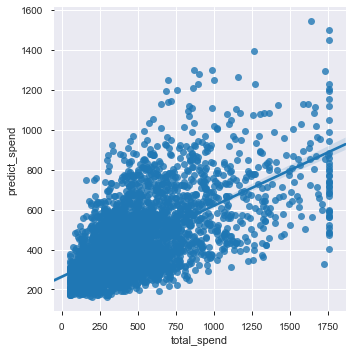

In [1264]:
sns.lmplot(x='total_spend', y='predict_spend', data = train)

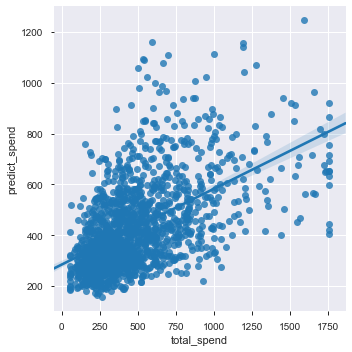

In [1265]:
sns.lmplot(x='total_spend', y='predict_spend', data = test)

### Check for asumptions

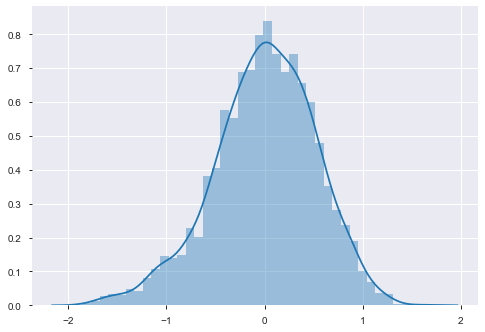

In [1266]:
#residuals follow normal distribution
sns.distplot(lm.resid)
plt.show()

In [1267]:
#The residulas are normally istributed

In [1268]:
#mean of residuals = 0
lm.resid.mean()

5.262279501039302e-14

In [1269]:
# no correlation of errors with Y
stats.pearsonr(lm.resid, train.total_spend)

(0.6849573135405587, 0.0)

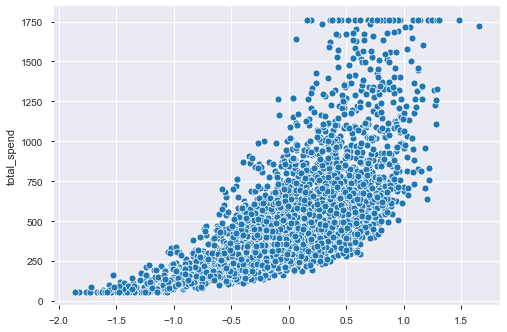

In [1270]:
#homoscedacity of errors
sns.scatterplot(lm.resid, train.total_spend)

### Final Prediction on test data

In [1271]:
model_features = ['lninc' ,'ed' , 'cardtenurecat_3'  , 'card_4' ,'card2_4' ,'card2_3' ,'card2_2', 'card_3' , 'card_2' ,
                    'card2_5'  , 'card_5' ,
                    'reason_2' , 'reason_4' ,'gender_1' ,
                   'age']
#add Y variable and predicted Y
model_features.extend(['total_spend', 'predict_spend'])

test[model_features].head()

,lninc,ed,cardtenurecat_3,card_4,card2_4,card2_3,card2_2,card_3,card_2,card2_5,card_5,reason_2,reason_4,gender_1,age,total_spend,predict_spend
3089,4.204693,13,0,0,1,0,0,0,1,0,0,0,0,0,34,374.44,422.275398
4649,4.574711,17,0,0,1,0,0,0,0,0,0,0,0,0,77,803.56,770.448463
979,3.970292,14,0,0,0,1,0,0,1,0,0,0,0,1,71,400.49,357.411268
1864,4.812184,15,0,1,0,0,1,0,0,0,0,0,0,1,73,202.51,427.297139
2393,3.713572,20,0,1,0,0,1,0,0,0,0,0,0,1,35,736.13,301.921545
